**using this there is no need to reload your packages every time when you will make any improvement to them**

In [1]:
%load_ext autoreload

In [2]:
autoreload 2

**import necessary libraries**

In [3]:
import numpy as np
import pandas as pd 
import warnings

from pathlib import Path 

**import modelling helpers**

In [4]:
from sklearn.model_selection import train_test_split

**set pandas options**

In [5]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 200

**set warnings options**

In [6]:
warnings.filterwarnings("ignore")

**load data**

## you need to change data path manually here :)

In [7]:
LOCAL_PATH = Path('/Users/mjasiecz/PycharmProjects/') #here

PROJECT_PATH = Path('new_offer_success_predictor/data/raw/')
filename = 'client_database'
suffix = '.parquet'

In [8]:
data_path = LOCAL_PATH.joinpath(PROJECT_PATH).joinpath(Path(filename)).with_suffix(suffix)

In [9]:
df = pd.read_parquet(data_path, engine='pyarrow')

In [10]:
len(df)

1309

In [11]:
df.shape

(1309, 15)

In [12]:
df.columns

Index(['offer_class', 'accepted', 'name', 'gender', 'age', 'phone_calls',
       'emails', 'customer_code', 'salary', 'offer_code', 'customer_type',
       'number', 'offer_value', 'estimated_expenses', 'center'],
      dtype='object')

In [13]:
df.shape[0]-df[df['accepted'].isna()].shape[0]

1289

In [14]:
# dataset train/test preparation

In [15]:
df[df['accepted'].isna()].shape

(20, 15)

In [16]:
df.shape

(1309, 15)

In [17]:
#df_train.columns

In [18]:
csv_suffix = '.csv'

In [19]:
train_dataset = LOCAL_PATH.joinpath(PROJECT_PATH).joinpath('train').with_suffix(csv_suffix)

In [20]:
test_dataset = LOCAL_PATH.joinpath(PROJECT_PATH).joinpath('test').with_suffix(csv_suffix)

In [21]:
if train_dataset.exists() and test_dataset.exists():
    print('Split is done. Do not data snoop!')
else:
    print('Preparing train and test datasets.')
    df = df[~df['accepted'].isna()].set_index('name')
    df_predictors = df.drop(columns=['accepted'])
    df_target = df['accepted']
    df_train, df_test, df_train_target, df_test_target = train_test_split(df_predictors, df_target, test_size=0.3, random_state=42)
    df_train.insert(0, column='accepted', value=df_train_target)
    df_test.insert(0, column='accepted', value=df_test_target)
    df_train.to_csv(path_or_buf=train_dataset)
    df_test.to_csv(path_or_buf=test_dataset)
    print('Datasets are ready to use.')

Split is done. Do not data snoop!


In [22]:
train_df = pd.read_csv(train_dataset, index_col='name')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
offer_class           1289 non-null object
accepted              1289 non-null object
name                  1289 non-null object
gender                1289 non-null object
age                   877 non-null float64
phone_calls           1286 non-null float64
emails                1287 non-null float64
customer_code         1265 non-null object
salary                1281 non-null float64
offer_code            1287 non-null object
customer_type         1287 non-null object
number                1280 non-null object
offer_value           1277 non-null float64
estimated_expenses    1286 non-null float64
center                1306 non-null object
dtypes: float64(6), object(9)
memory usage: 163.6+ KB


In [24]:
#df_train.columns

In [25]:
#df_test.shape

In [26]:
#df_train_predictors.head()

In [27]:
#predictors_train, predictors_test, target_train, target_test

In [28]:
df.shape

(1309, 15)

In [29]:
df.head()

,offer_class,accepted,name,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
0,Medium,yes,C7CBB5C5613449B,female,29.0,0.0,0.0,24160,21133.75,4AB,S,9E9FA,57.426571,4692.0,A
1,Medium,yes,CFD09C0248BB417,male,NaN,1.0,2.0,113781,15155.00,61A,S,1E53D,141.639912,3164.0,A
2,Medium,no,A2A0DC541977473,female,NaN,1.0,3.0,113781,15155.00,DB4,S,1.36E+06,154.821130,1852.0,A
3,Medium,no,9068458EB70D427,male,30.0,1.0,2.0,113781,15155.00,9B6,S,F6529,106.256196,3753.0,B
4,Medium,no,46F0CD19CF71429,female,25.0,1.0,2.0,113781,15155.00,191,S,E2FDF,139.237147,2410.0,A


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
offer_class           1289 non-null object
accepted              1289 non-null object
name                  1289 non-null object
gender                1289 non-null object
age                   877 non-null float64
phone_calls           1286 non-null float64
emails                1287 non-null float64
customer_code         1265 non-null object
salary                1281 non-null float64
offer_code            1287 non-null object
customer_type         1287 non-null object
number                1280 non-null object
offer_value           1277 non-null float64
estimated_expenses    1286 non-null float64
center                1306 non-null object
dtypes: float64(6), object(9)
memory usage: 163.6+ KB


In [31]:
df.shape

(1309, 15)

**test/train datasets preparation**

In [32]:
df.columns

Index(['offer_class', 'accepted', 'name', 'gender', 'age', 'phone_calls',
       'emails', 'customer_code', 'salary', 'offer_code', 'customer_type',
       'number', 'offer_value', 'estimated_expenses', 'center'],
      dtype='object')

In [33]:
set(df.columns)

{'accepted',
 'age',
 'center',
 'customer_code',
 'customer_type',
 'emails',
 'estimated_expenses',
 'gender',
 'name',
 'number',
 'offer_class',
 'offer_code',
 'offer_value',
 'phone_calls',
 'salary'}

**benchmark models**

In [34]:
initially_dropped = ['offer_class', 'customer_code', 'offer_code', 'customer_type', 'number', 'center']

In [35]:
df_1 = df[['phone_calls', 'emails', 'age', 'gender', 'salary', 'offer_value', 'estimated_expenses', 'accepted']] #name

In [36]:
df_1 = df

In [37]:
assert set(df.columns) == set(df_1.columns).union(set(initially_dropped))

In [38]:
df_1.shape

(1309, 15)

In [39]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
offer_class           1289 non-null object
accepted              1289 non-null object
name                  1289 non-null object
gender                1289 non-null object
age                   877 non-null float64
phone_calls           1286 non-null float64
emails                1287 non-null float64
customer_code         1265 non-null object
salary                1281 non-null float64
offer_code            1287 non-null object
customer_type         1287 non-null object
number                1280 non-null object
offer_value           1277 non-null float64
estimated_expenses    1286 non-null float64
center                1306 non-null object
dtypes: float64(6), object(9)
memory usage: 163.6+ KB


In [40]:
# df_1 = df_1.set_index('name')

In [41]:
df_1.describe()

,age,phone_calls,emails,salary,offer_value,estimated_expenses
count,877.000000,1286.000000,1287.000000,1281.000000,1277.000000,1286.000000
mean,33.511973,0.497667,0.881896,3297.296011,128.693732,4576.947900
std,12.247058,1.041360,1.022320,5034.240427,57.677807,1909.458459
min,18.000000,0.000000,0.000000,0.000000,50.022619,1257.000000
25%,24.000000,0.000000,0.000000,789.580000,82.632085,2934.750000
50%,30.000000,0.000000,1.000000,1445.420000,118.645478,4544.000000
75%,41.000000,1.000000,1.000000,3127.500000,162.482961,6225.750000
max,80.000000,8.000000,10.000000,51232.920000,368.668534,7891.000000


In [42]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 15 columns):
offer_class           1289 non-null object
accepted              1289 non-null object
name                  1289 non-null object
gender                1289 non-null object
age                   877 non-null float64
phone_calls           1286 non-null float64
emails                1287 non-null float64
customer_code         1265 non-null object
salary                1281 non-null float64
offer_code            1287 non-null object
customer_type         1287 non-null object
number                1280 non-null object
offer_value           1277 non-null float64
estimated_expenses    1286 non-null float64
center                1306 non-null object
dtypes: float64(6), object(9)
memory usage: 163.6+ KB


In [43]:
df_1.shape

(1309, 15)

In [44]:
#try to rescale data from quarter to 6 months (multiply by 2)

In [45]:
df_1.dropna(subset=['phone_calls', 'emails', 'salary', 'offer_value', 'estimated_expenses']).shape[0]/df_1.shape[0]

0.9633307868601986

In [46]:
df_1 = df_1.dropna(subset=['phone_calls', 'emails', 'salary', 'offer_value', 'estimated_expenses'])

In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 0 to 1288
Data columns (total 15 columns):
offer_class           1261 non-null object
accepted              1261 non-null object
name                  1261 non-null object
gender                1261 non-null object
age                   858 non-null float64
phone_calls           1261 non-null float64
emails                1261 non-null float64
customer_code         1237 non-null object
salary                1261 non-null float64
offer_code            1259 non-null object
customer_type         1259 non-null object
number                1252 non-null object
offer_value           1261 non-null float64
estimated_expenses    1261 non-null float64
center                1258 non-null object
dtypes: float64(6), object(9)
memory usage: 157.6+ KB


In [48]:
# wypelnic wiek wedlug zarobkow i plci <- regresja liniowa np?

In [49]:
df_1.loc[df_1['age'].isna(), 'age'] = np.mean(df_1['age'])

In [50]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1261 entries, 0 to 1288
Data columns (total 15 columns):
offer_class           1261 non-null object
accepted              1261 non-null object
name                  1261 non-null object
gender                1261 non-null object
age                   1261 non-null float64
phone_calls           1261 non-null float64
emails                1261 non-null float64
customer_code         1237 non-null object
salary                1261 non-null float64
offer_code            1259 non-null object
customer_type         1259 non-null object
number                1252 non-null object
offer_value           1261 non-null float64
estimated_expenses    1261 non-null float64
center                1258 non-null object
dtypes: float64(6), object(9)
memory usage: 157.6+ KB


In [51]:
df_1.head()

,offer_class,accepted,name,gender,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center
0,Medium,yes,C7CBB5C5613449B,female,29.000000,0.0,0.0,24160,21133.75,4AB,S,9E9FA,57.426571,4692.0,A
1,Medium,yes,CFD09C0248BB417,male,33.458625,1.0,2.0,113781,15155.00,61A,S,1E53D,141.639912,3164.0,A
2,Medium,no,A2A0DC541977473,female,33.458625,1.0,3.0,113781,15155.00,DB4,S,1.36E+06,154.821130,1852.0,A
3,Medium,no,9068458EB70D427,male,30.000000,1.0,2.0,113781,15155.00,9B6,S,F6529,106.256196,3753.0,B
4,Medium,no,46F0CD19CF71429,female,25.000000,1.0,2.0,113781,15155.00,191,S,E2FDF,139.237147,2410.0,A


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [53]:
figsize = (6,6)

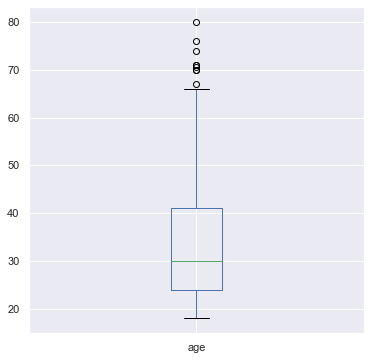

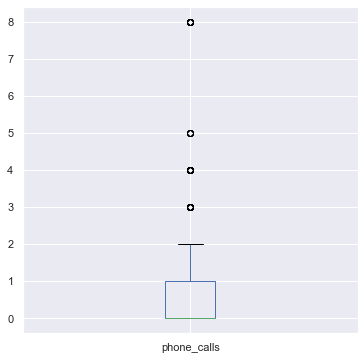

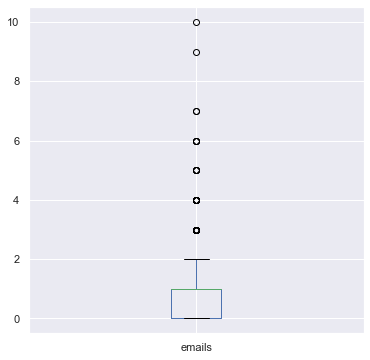

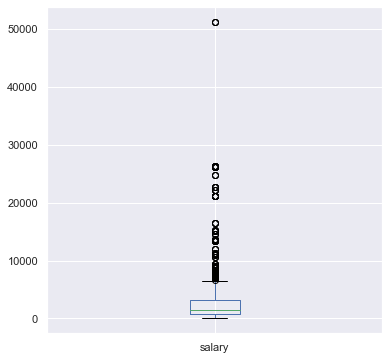

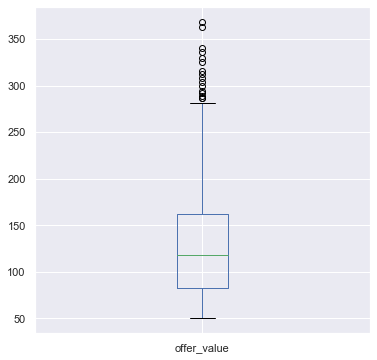

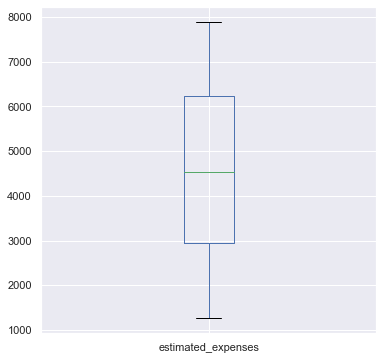

In [54]:
for column in df.columns:
    if df[column].dtype != object:
        df.boxplot(column=column, figsize=figsize)
        plt.show()

try 5-6 types of classifiers

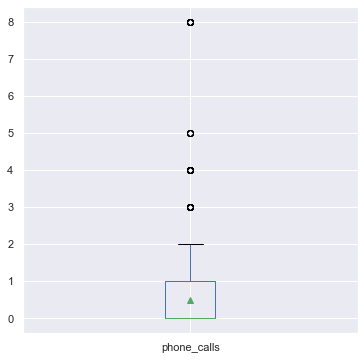

In [55]:
figsize=(6,6)
df_1.boxplot(column='phone_calls', figsize=figsize, showmeans=True)
plt.show()

In [56]:
from sklearn.utils.testing import all_estimators

estimators = all_estimators()

for name, class_ in estimators:
    if hasattr(class_, 'predict_proba'):
        print(name)

AdaBoostClassifier
BaggingClassifier
BayesianGaussianMixture
BernoulliNB
CalibratedClassifierCV
ClassifierChain
ComplementNB
DecisionTreeClassifier
DummyClassifier
ExtraTreeClassifier
ExtraTreesClassifier
GaussianMixture
GaussianNB
GaussianProcessClassifier
GradientBoostingClassifier
GridSearchCV
HistGradientBoostingClassifier
KNeighborsClassifier
LabelPropagation
LabelSpreading
LinearDiscriminantAnalysis
LogisticRegression
LogisticRegressionCV
MLPClassifier
MultiOutputClassifier
MultinomialNB
NuSVC
OneVsRestClassifier
Pipeline
QuadraticDiscriminantAnalysis
RFE
RFECV
RandomForestClassifier
RandomizedSearchCV
SGDClassifier
SVC
VotingClassifier
_BinaryGaussianProcessClassifierLaplace
_ConstantPredictor


In [57]:
#gridsearch/randomizedsearch

In [58]:
#some method for dimensionality reduction (to be able to provide explanation to bussiness)/ visualization
# some way to present feature importance

In [59]:
classifiers = {}

In [60]:
df_1['accepted'] = df_1['accepted'].map({'no':0,
                                         'yes':1})

In [61]:
df_1['is_male'] = df_1['gender'] == 'male'

In [62]:
df_1.drop(columns=['gender'], inplace=True)

In [63]:
df_1['accepted'][:4]

0    1
1    1
2    0
3    0
Name: accepted, dtype: int64

In [64]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [65]:
df_1['salary'].to_numpy()

array([21133.75, 15155.  , 15155.  , ...,   722.5 ,   722.5 ,   787.5 ])

In [66]:
transformer = RobustScaler().fit(df_1[['salary']])

In [67]:
df_1['salary'] = transformer.transform(df_1[['salary']])

In [68]:
df_1.head()

,offer_class,accepted,name,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,is_male
0,Medium,1,C7CBB5C5613449B,29.000000,0.0,0.0,24160,8.521537,4AB,S,9E9FA,57.426571,4692.0,A,False
1,Medium,1,CFD09C0248BB417,33.458625,1.0,2.0,113781,5.933804,61A,S,1E53D,141.639912,3164.0,A,True
2,Medium,0,A2A0DC541977473,33.458625,1.0,3.0,113781,5.933804,DB4,S,1.36E+06,154.821130,1852.0,A,False
3,Medium,0,9068458EB70D427,30.000000,1.0,2.0,113781,5.933804,9B6,S,F6529,106.256196,3753.0,B,True
4,Medium,0,46F0CD19CF71429,25.000000,1.0,2.0,113781,5.933804,191,S,E2FDF,139.237147,2410.0,A,False


In [69]:
target = df_1.loc[:, 'accepted']

In [70]:
type(target)

pandas.core.series.Series

In [71]:
predictors = df_1.drop(columns=['accepted'])

In [72]:
predictors.head()

,offer_class,name,age,phone_calls,emails,customer_code,salary,offer_code,customer_type,number,offer_value,estimated_expenses,center,is_male
0,Medium,C7CBB5C5613449B,29.000000,0.0,0.0,24160,8.521537,4AB,S,9E9FA,57.426571,4692.0,A,False
1,Medium,CFD09C0248BB417,33.458625,1.0,2.0,113781,5.933804,61A,S,1E53D,141.639912,3164.0,A,True
2,Medium,A2A0DC541977473,33.458625,1.0,3.0,113781,5.933804,DB4,S,1.36E+06,154.821130,1852.0,A,False
3,Medium,9068458EB70D427,30.000000,1.0,2.0,113781,5.933804,9B6,S,F6529,106.256196,3753.0,B,True
4,Medium,46F0CD19CF71429,25.000000,1.0,2.0,113781,5.933804,191,S,E2FDF,139.237147,2410.0,A,False


In [73]:
target.head()

0    1
1    1
2    0
3    0
4    0
Name: accepted, dtype: int64

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# from sklearn.preprocessing import 

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix # we want to maximize recall <- because i want to maximize amount of people who accepted my offer

In [80]:
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=42)

In [81]:
np.sum(target_test[target_test == 1])/target_test.shape[0]

0.37730870712401055

In [82]:
np.sum(target_train[target_train == 1])/target_train.shape[0]

0.3786848072562358

In [83]:
from sklearn.pipeline import Pipeline, make_pipeline, make_union # check 

In [84]:
logistic_regression_clf = LogisticRegression(penalty='l1', class_weight={
    0:0.63, 1:0.37}) #grid search on class weight

In [85]:
logistic_regression_clf.fit(predictors_train, target_train)

ValueError: could not convert string to float: 'A'

In [ ]:
target_predicted = logistic_regression_clf.predict(predictors_test)

In [ ]:
accuracy = accuracy_score(target_test, target_predicted)

In [ ]:
print(accuracy)

In [ ]:
confusion_logr = confusion_matrix(target_test, target_predicted)

In [ ]:
print(confusion_logr)

In [ ]:
recall = confusion_logr[1,1]/(confusion_logr[1,0]+confusion_logr[1,1])

In [ ]:
print(recall)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_clf = RandomForestClassifier()

In [ ]:
random_forest_clf.fit(predictors_train, target_train)

In [ ]:
target_predicted = random_forest_clf.predict(predictors_test)

In [ ]:
accuracy = accuracy_score(target_test, target_predicted)

In [ ]:
print(accuracy)

In [ ]:
confusion_rf = confusion_matrix(target_test, target_predicted)

In [ ]:
print(confusion_rf)

In [ ]:
nearest_neighbors_clf = KNeighborsClassifier(n_neighbors=18)

In [ ]:
nearest_neighbors_clf.fit(predictors_train, target_train)

In [ ]:
target_predicted = nearest_neighbors_clf.predict(predictors_test)

In [ ]:
print(confusion_matrix(target_test, target_predicted))

In [ ]:
print(accuracy_score(target_test, target_predicted))